# 기본적인 영상처리 기법

## 영상의 밝기 조절

* 이미지의 픽셀 값에 값을 더하여 밝기를 조절할 수 있다.

* 주의할 점: 

    - 픽셀 값의 범위는 0~255 사이값으로 이루어져 있다.
    - 픽셀 값은 255에 가까울수록 밝고, 0에 가까울수록 어둡다. 
    - 이미지의 밝기를 조절하는 것은 픽셀 값에 값을 더하거나 빼서 밝기 조절이 가능하다.
    - 더한 값이 Max값인 255를 초과하면 오버플로우가 발생하게 된다.    
    - 최하 값이 0이하면 언더플로우가 발생하게 된다.

    IMG2(x, y)=IMG(x, y)+value

* 이미지의 연산

    - 이미지 픽셀 값의 타입은 uint8, 8비트 숫자 255까지만 표현이 가능하다. 
    - 256은 이진수로 9비트가 필요하여 uint8 형식에서는 다시 0이 된다.
    - 아주 밝은 부분이 아주 어둡게, 반대로 아주 어두운 부분이 아주 밝게 표현되어 이미지가 변질된다.


* 픽셀값이 255를 넘으면 255로, 0 미만이면 0으로 처리한다.

In [2]:
# 필요한 라이브러리를 로딩한다.

import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt
%matplotlib inline

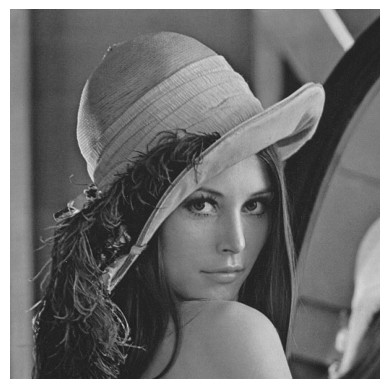

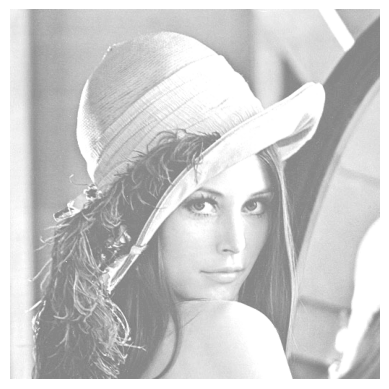

In [5]:
# 그레이스케일 영상 불러오기
src_gray = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)

dst_gray = cv2.add(src_gray, 100)

# np기능 이용
# .을 붙여서 실수로 만들기, np.unit8로 부호없는 정수로 변환
#dst = np.clip(src + 100., 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(src_gray, cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()
plt.imshow(cv2.cvtColor(dst_gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

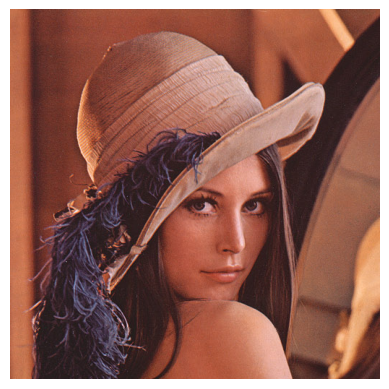

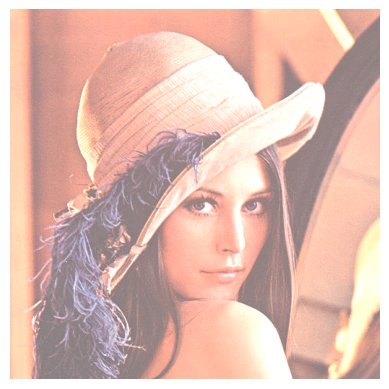

In [6]:
# 컬러 영상 불러오기
src_color = cv2.imread('lena.png')

dst_color = cv2.add(src_color, (100, 100, 100, 0))
#dst = np.clip(src + 100., 0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(src_color, cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()
plt.imshow(cv2.cvtColor(dst_color, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 영상의 산술 연산

* 덧셈 연산

     ```dst(x,y) = saturate(src1(x,y) + src2(x,y))```
     
    - 두 영상의 같은 위치에 존재하는 픽셀 값을 더하여 결과 영상의 픽셀 값으로 설정
    - 덧셈 결과가 255보다 크면 픽셀 값을 255로 설정(포화 연산)
    
    
* 공식

    ``cv2.add(src1,src2,dst=None,mask=None,dtype=None) -> dst```
    
    - src1: ( 입력 ) 첫 번째 영상 또는 스칼라
    - src2: ( 입력 ) 두 번째 영상 또는 스칼라
    - dst ( 출력 ) 덧셈 연산의 결과 영상
    - mask: 마스크 영상
    - dtype 출력 영상 dst 의 타입 . (e.g.) cv2.CV_8U, cv2.CV_32F 
    
    
* 가중치 합(weighted sum)    

     ```dst(x,y) = saturate(A*src1(x,y) + B*src2(x,y))```
     
     - 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 가중합을 계산하여 결과 영상의 픽셀 값으로 설정
     - 보통 A+B=1이 되도록 설정 --> 두 입력 영상의 평균 밝기를 유지
     
     
* 평균 연산

     ```dst(x,y) = 1/2(src1(x,y) + src2(x,y))```
     
     - 가중치를 A=B=0.5로 설정한 가중치 합

* 가중치에 따른 영상의 변화

    ```cv2.addWeighted(src1,alpha,src2,beta,gamma,dst=None,dtype=None) -> dst```
    
    - src1: 첫 번째 영상
    - alpha: 첫 번째 영상 가중치
    - src2: 두 번째 영상 . src1 과 같은 크기 & 같은 타입
    - beta: 두 번째 영상 가중치
    - gamma: 결과 영상에 추가적으로 더할 값
    - dst 가중치 합 결과 영상
    - dtype 출력 영상 dst 의 타입

* 뺄셈 연산


    ```dst(x,y) = saturate(src1(x,y) -src2(x,y))```
    
    - 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 
    - 뺄셈 연산을 수행하여 결과 영상의 픽셀 값으로 설정
    - 뺄셈 결과가 0보다 작으면 픽셀 값을 0으로 설정 (포화 연산)



* 공식

    ```cv2.subtract(src1,stc2,dst=None,mask=None,dtype=None) ->dst```
    
    - src1: 첫 번째 영상 또는 스칼라
    - src2: 두 번째 영상 또는 스칼라
    - dst 뺄셈 연산 결과 영상
    - mask: 마스크 영상
    - dtype 출력 영상 dst 의 타입
    
    
* 차이연산

    ```dst(x,y) = |src1(x,y) - src2(x,y)|```
    
    - 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 뺄셈 연산을 수행한 후,
    - 그 절댓값을 결과 영상의 픽셀 값으로 설정
    - 뺄셈 연산과 달리 입력 영상의 순서에 영향을 받지 않음
    
* 공식

    ```cv2.absdiff(src1,src2,dst=None) -> dst```
    
    - src1: 첫 번째 영상 또는 스칼라
    - src2: 두 번째 영상 또는 스칼라
    - dst 차이 연산 결과 영상 차영상

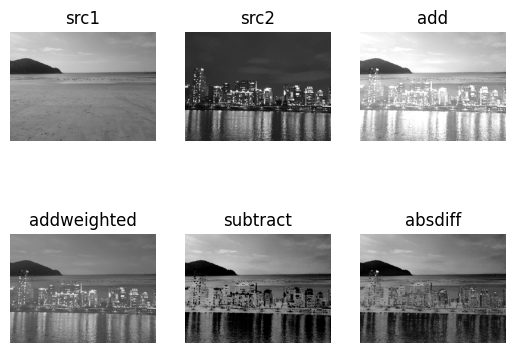

In [24]:
# 필요한 라이브러리를 로딩한다.

import sys
import numpy as np
import cv2
from matplotlib import pyplot as plt

# 사이즈가 같은 이미지 두개를 읽어온다.
src1=cv2.imread('data/bea.jpg',cv2.IMREAD_GRAYSCALE)
src2=cv2.imread('data/night.jpg',cv2.IMREAD_GRAYSCALE)

# 두 이미지를 더한다.
dst1=cv2.add(src1,src2,dtype=cv2.CV_8U)

# 두 이미지에 가중치를 똑같이 0.5씩주고 더한다.
dst2=cv2.addWeighted(src1,0.5,src2,0.5,0.0)

# 앞의 이미지에서 뒤의 이미지를 같은 위치의 픽셀값을 기준으로 뺄셈한다.
dst3=cv2.subtract(src1,src2)

# 두 이미지의 같은 위치의 픽셀값들의 차를 구한다.
dst4=cv2.absdiff(src1,src2)

# 두 이미지의 원본 이미지를 출력한다.
plt.subplot(231),plt.axis('off'),plt.imshow(src1,'gray'),plt.title('src1')
plt.subplot(232),plt.axis('off'),plt.imshow(src2,'gray'),plt.title('src2')

#add, weight add, subtract, absdiff 값을 찰례로 출력한다.
plt.subplot(233),plt.axis('off'),plt.imshow(dst1,'gray'),plt.title('add')
plt.subplot(234),plt.axis('off'),plt.imshow(dst2,'gray'),plt.title('addweighted')
plt.subplot(235),plt.axis('off'),plt.imshow(dst3,'gray'),plt.title('subtract')
plt.subplot(236),plt.axis('off'),plt.imshow(dst4,'gray'),plt.title('absdiff')
plt.show()

## 영상의 논리연산

[비트 단위] AND, OR, XOR, NOT 연산

* cv2.bitwise_and(src1, src2, dst=None, mask=None) -> dst
* cv2.bitwise_or(src1, src2, dst=None, mask=None) -> dst
* cv2.bitwise_xor(src1, src2, dst=None, mask=None) -> dst
* cv2.bitwise_not(src1, dst=None, mask=None) -> dst

    - src1: 첫 번째 영상 또는 스칼라
    - src2: 두 번째 영상 또는 스칼라
    - dst: 출력 영상
    - mask: 마스크 영상
    - 각각의 픽셀 값을 이진수로 표현하고, 비트(bit) 단위 논리 연산을 수행

## 컬러 영상 처리와 색 공간

[OpenCV와 컬러 영상]

* 컬러 영상은 3차원 numpy.ndarray로 표현. img.shape=(h,w,3)
* openCV에서는 RGB순서가 아니라 BGR 순서를 기본으로 사용한다.

[영상 채널 분리]

* cv2.split()을 사용하여 다중 채널 영상을 튜플에 단일 채널 영상으로 분리한다.

     ```[mv = cv2.split(m[, mv])]```
 
 
     * m: 다중 채널 배열(영상)
     * mv: 단일 채널 배열(튜플)
     

[영상 채널 병합]

* cv2.merge()를 사용하여 단일 채널 영상을 병합하여 다중 채널 영상을 생성한다.  

    ```[dst = cv2.merge(mv[, dst])]```
 
 
     * mv:단일 채널 배열 영상(리스트)
     * dst: 다중 채널 배열(영상)     

In [9]:
# 필요한 라이브러리를 로딩한다.

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 이미지를 불러온다.

img= cv2.imread('lena.png')
print(type(img))

<class 'numpy.ndarray'>


In [15]:
# 원본 이미지를 분리한다.

dst=cv2.split(img)
print(type(dst))
print(type(dst[0]))
print(type(dst[1]))
print(type(dst[2]))

# 채널 순서로 0-채널은 blue, 1-채널은 green, 2-채널은 red이다.

<class 'tuple'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [21]:
cv2.imshow('blue', dst[0])
cv2.imshow('green', dst[1])
cv2.imshow('red', dst[2])
cv2.waitKey()
cv2.destroyAllWindows()

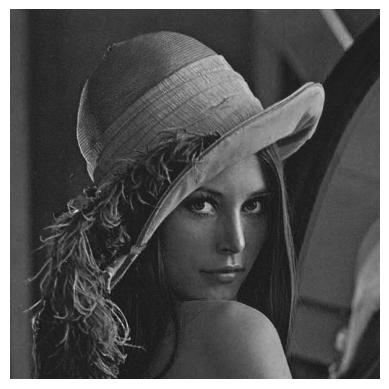

In [16]:
plt.imshow(cv2.cvtColor(dst[0], cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()

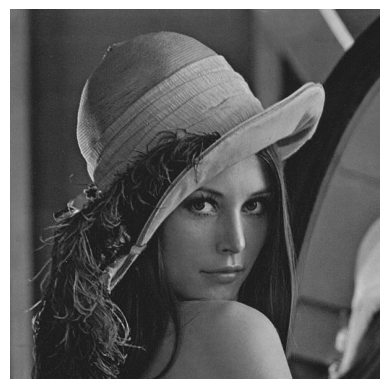

In [19]:
plt.imshow(cv2.cvtColor(dst[1], cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()

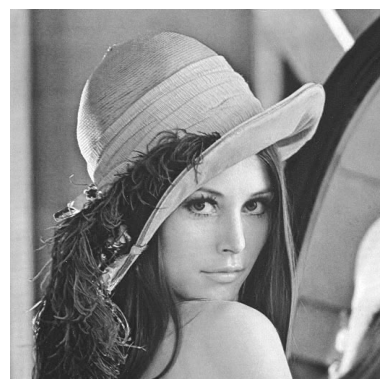

In [20]:
plt.imshow(cv2.cvtColor(dst[2], cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()

In [23]:
# 채널을 병합해본다.
# 앞서 분리한 채널을 입력받아 병합을 처리한다.
src = cv2.merge([dst[0], dst[1], dst[2]]) 

print(type(src))
print(src.shape)
cv2.imshow('src', src)

cv2.waitKey()    
cv2.destroyAllWindows()


<class 'numpy.ndarray'>
(512, 512, 3)


[색 공간 변환]

* 영상 처리에서는 특정한 목적을 위해 RGB 색 공간을 
* HSV, YCrCb, Grayscale등의 다른 색 공간으로 변환하여 처리

[색 공간 변환 함수]

* 공식

    ```cv2.cvtColor(src,code,dst=None,dstCn=None) ->dst```
    
    - src: 입력 영상
    - code:  색 변환 코드
        
        * BGR <--> GRAY : cv2.COLOR_BGR2GRAY / cv2.COLOR_GRAY2BGR
        * BGR <--> RGB  : cv2.COLOR_BGR2RGB  / cv2.COLOR_RGB2BGR
        * BGR <--> HSV  : cv2.COLOR_BGR2HSV  / cv2.COLOR_HSV2BGR
        * BGR <--> YCrCb : cv2.COLOR_YCrCb2BGR  / cv2.COLOR_YCrCb2BGR
  
    - dstCn : 결과 영상의 채널 수 . 0 이면 자동 결정
    - dst 출력 영상
    
* RGB 색상을 그레이스케일로 변환

     ```Y = 0.299R + 0.587G + 0.114B```
     
     - 장점: 데이터 저장 용량 감소, 데이터 처리 속도 향상
     - 단점: 색상 정보 손실
     
        <img src="data/GRAY.png" width = 800px>     
     

[HSV 색공간]

* Hue: 색상, 색의 종류
* Saturation: 채도, 색의 탁하고 선명한 정도
* Value: 명도, 빛의 밝기


[HSV값 범위]

* cv2.CV_8U 영상의 경우

    - 0 ≤ 𝐻 ≤ 179
    - 0 ≤ 𝑆 ≤ 255
    - 0 ≤ 𝑉 ≤ 255
    
<img src="data/hsv.png" width = 300px>    <img src="data/hsv2.png" width = 300px>


[YCrCb 색공간]

* PAL, NTSC, SECAM 등의 컬러 비디오 표준에 사용되는 색 공간
* 영상의 밝기 정보와 색상 정보를 따로 분리하여 부호화 (흑백 TV 호환)
* Y: 밝기 정보 (luma)
* Cr, Cb : 색차 (chroma)


[YCrCb 값 범위]

* cv2.CV_8U 영상의 경우

    - 0 ≤ Y ≤ 179
    - 0 ≤ Cr ≤ 255
    - 0 ≤ Cb ≤ 255
    
<img src="data/ycr1.png" width = 300px>    <img src="data/ycr2.png" width = 300px>

## 히스토그램 분석

[히스토그램 (Histogram)]

* 영상의 픽셀 값 분포를 그래프의 형태로 표현한 것

[정규화된 히스토그램 (Normalized histogram)]

* 각 픽셀의 개수를 영상 전체 픽셀 개수로 나누어준 것
* 해당 그레이스케일 값을 갖는 픽셀이 나타날 확률


* 히스토그램 구하는 공식

  ```cv2.calHist(images,channels,mask,histSize,ranges,hist=None,accumulatE=None) -> hist```
  
     - images: 입력 영상 리스트
     - channels: 히스토그램을 구할 채널을 나타내는 리스트
     - mask: 마스크 영상 입력 영상 전체에서 히스토그램을 구하려면 None 지정
     - histSize : 히스토그램 각 차원의 크기 빈 (bin) 의 개수 를 나타내는 리스트
     - ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
     - hist: 계산된 히스토그램 (numpy.ndarray)
     - accumulate: 기존의 hist 히스토그램에 누적하려면 True, 새로 만들려면 False.

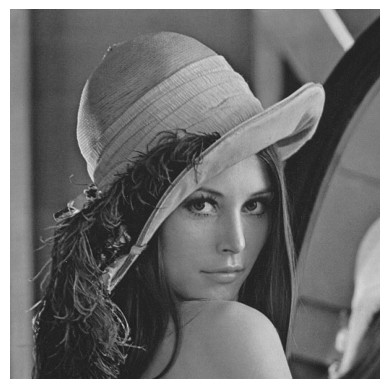

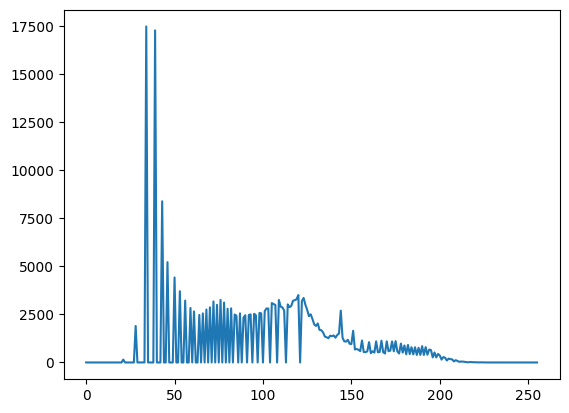

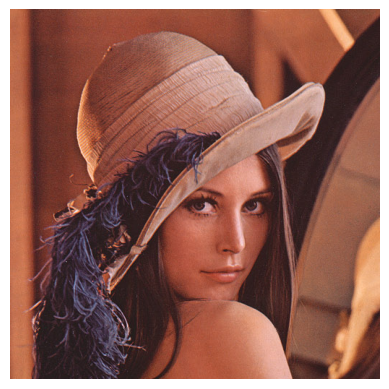

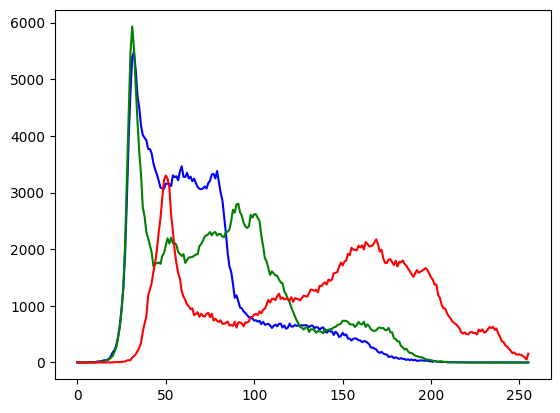

In [5]:
# 그레이스케일 영상, 컬러 영상의 히스토그램 구하기

# 필요한 라이브러리 로딩
import cv2
import numpy as np
import sys
import matplotlib.pyplot as plt

# 이미지를 그레이로 읽는다.
src=cv2.imread('./data/lena.png',cv2.IMREAD_GRAYSCALE)

# 히스토그램 값을 구한다.
hist=cv2.calcHist([src],[0],None,[256],[0,256])

# 그레이 이미지를 출력한다.
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()

# 그레이 이미지에 대한 히스토그램을 출력한다.
plt.plot(hist)
plt.show()

# 이미지를 칼라로 읽는다.
src=cv2.imread('./data/lena.png')

# 컬러를 채널로 분리한다.
colors=['b','g','r']
bgr_planes=cv2.split(src)

# 칼라 이미지를 출력한다.
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)) 
plt.axis('off')
plt.show()

# 각 채널별로 히스토그램 값을 구한다.
for(p,c) in zip(bgr_planes,colors):
    hist=cv2.calcHist([p],[0],None,[256],[0,256])
    plt.plot(hist,color=c)

plt.show()

## 영상의 명암비 조절

[명암비(contrast)]

* 밝은 곳과 어두운 곳 사이에 드러나는 밝기 정도의 차이
* 컨트라스트, 대비

[기본적인 명암비 조절 함수]

    dst(x,y) = saturate(s*src(x,y))
    
   
[효과적인 명암비 조절 함수]

    dst(x,y) = saturate(srx(x,y) + (src(x,y) - 128)*A)

In [9]:
import sys
import cv2
import numpy as np  

src=cv2.imread('data/clova.jpg',cv2.IMREAD_GRAYSCALE)

if src is None:
    print('image load failed!')
    sys.exit()

alpha=0.5
dst=np.clip((1+alpha)*src - 128*alpha,0,255).astype(np.uint8)         
#이 수식의 결과의 범위를 지정 #실수형으로 나오므로 int형으로 변환 필요

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.waitKey()

32

In [8]:
# 기본적인 명암비 조절 예제

import sys
import cv2
import numpy as np  

src=cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

alpha=0.5
dst=np.clip(1.5*src - 128*0.5, 0, 255).astype(np.uint8)    

#이 수식의 결과의 범위를 지정 #실수형으로 나오므로 int형으로 변환 필요

# 칼라 이미지를 출력한다.
#plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB)) 

plt.imshow(src)
plt.axis('off')
plt.show()

plt.imshow(dst)
plt.axis('off')
plt.show()

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

[히스토그램 스트레칭(Histogram stretching)]

* 영상의 히스토그램이 그레이스케일 전 구간에서 걸쳐 나타나도록 변경하는 선형 변환 기법

* 공식

   ```cv2.normalize(src,dst,alpha=None,beta=None,norm_type=None,dtpye=None,maks=None) -> dst```

    - src: 입력 영상
    - dst 결과 영상
    - alpha: ( 노름 정규화인 경우 ) 목표 노름 값, (원소 값 범위 정규화인 경우) 최솟값
    - beta: ( 원소 값 범위 정규화인 경우 ) 최댓값
    - norm_type: 정규화 타입.NORM_INF, NORM_L1, NORM_L2, NORM_, NORM_MINMAX
    - dtype 결과 영상의 타입
    - mask: 마스크 영상

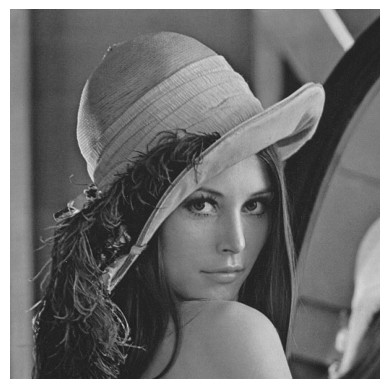

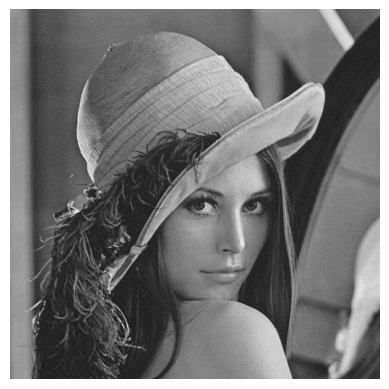

In [10]:
# 히스토그램 스트레칭을 이용한 명암비 자동 조절

import numpy as np
import cv2

src = cv2.imread('./data/lena.png', cv2.IMREAD_GRAYSCALE)

gmin, gmax, _, _ = cv2.minMaxLoc(src)
#dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
dst = ((src - gmin) * 255. / (gmax - gmin)).astype(np.uint8)

plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## 특정 색상 영역 추출하기

* RGB 색 공간에서 녹색 영역 추출하기

    - 0 ≤ R ≤ 100
    - 128 ≤ G ≤ 255
    - 0 ≤ B ≤ 100


* HSV 색 공간에서 녹색 영역 추출하기

    - 50 ≤ H ≤ 80
    - 150 ≤ S ≤ 255
    - 0 ≤ V ≤ 255

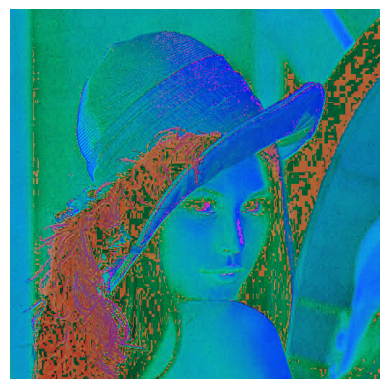

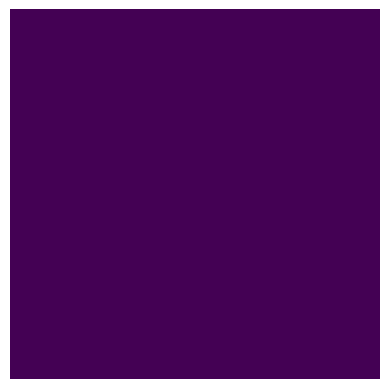

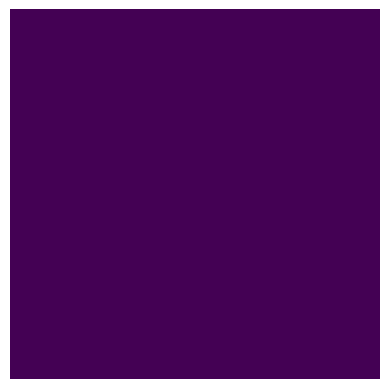

In [15]:
import cv2
import sys
import numpy as np

src = cv2.imread('./data/lena.png')

src_hsv=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
dst1=cv2.inRange(src,(0,128,0),(100,255,100))
dst2=cv2.inRange(src_hsv,(50,150,0),(80,255,255))  # 50<=h<=80, 150<=s<=255, 0<=v=<255

plt.imshow(src_hsv)
plt.axis('off')
plt.show()

plt.imshow(dst1)
plt.axis('off')
plt.show()

plt.imshow(dst2)
plt.axis('off')
plt.show()

* 특정 범위 안에 있는 행렬 원소 검출

    ```cv2.inRange(src,lowerb,upperb,dst=None) -> dst```
    
    - src 입력 행렬
    - lowerb : 하한 값 행렬 또는 스칼라
    - upperb 상한 값 행렬 또는 스칼라
    - dst : 입력 영상과 같은 크기의 마스크 영상
    - (numpy.uint8) 범위 안에 들어가는 픽셀은 255, 나머지는 0 으로 설정

In [16]:
# 트랙바를 이용한 특정 색상 영역 추출

import sys
import numpy as np
import cv2


src = cv2.imread('./data/lena.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

def on_trackbar(pos):
    hmin = cv2.getTrackbarPos('H_min', 'dst')
    hmax = cv2.getTrackbarPos('H_max', 'dst')

    dst = cv2.inRange(src_hsv, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)

cv2.imshow('src', src)
cv2.namedWindow('dst')

cv2.createTrackbar('H_min', 'dst', 50, 179, on_trackbar)
cv2.createTrackbar('H_max', 'dst', 80, 179, on_trackbar)
on_trackbar(0)

cv2.waitKey()

cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


## 히스토그램 역투영

* 히스토그램 역투영 (Histogram backprojection)

    - 영상의 각 픽셀이 주어진 히스토그램 모델에 얼마나 일치하는지를 검사하는 방법
    - 임의의 색상 영역을 검출할 때 효과적
    
* 히스토그램 역투영 함수

    ```cv2.calBackProjection(images,channels,hist,ranges,scale,dst=None) -> dst```
    
     - images: 입력 영상 리스트
     - channels: 역투영 계산에 사용할 채널 번호 리스트
     - hist: 입력 히스토그램 (numpy.ndarray)
     - ranges: 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
     - scale: 출력 역투영 행렬에 추가적으로 곱할 값
     - dst 출력 역투영 영상 . 입력 영상과 동일 크기, cv2.CV_8U

In [ ]:
import sys
import numpy as np
import cv2

# 입력 영상에서 ROI를 지정하고, 히스토그램 계산

src = cv2.imread('./data/lena.png')

x, y, w, h = cv2.selectROI(src)     #마우스로 선택 영역을 제공해준다

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

crop = src_ycrcb[y:y+h, x:x+w]      #crop는 사용자가 선택한 사각형 영역의 부분 영상이다

channels = [1, 2]    #cr 채널과 cb 채널만 이용한다 y채널은 그레이스케일 값으로 컬러보다는 밝기 정보이기 때문이다
cr_bins = 128        #256 을 쓰는것이 정상인데 그냥 단순화 목적으로 줄임
cb_bins = 128
histSize = [cr_bins, cb_bins]
cr_range = [0, 256]  #0~255 까지 간다는 의미
cb_range = [0, 256]
ranges = cr_range + cb_range

hist=cv2.calcHist([crop],channels,None,histSize,ranges)

# 히스토그램 스트레칭
# 히스토그램 큰 값은 너무 큰 값에 몰릴 수 있으므로 
# log스케일 해주기. +1을 해줘서 -1값을 0으로
hist_norm = cv2.normalize(cv2.log(hist+1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# 입력 영상 전체에 대해 히스토그램 역투영

backproj = cv2.calcBackProject([src_ycrcb], channels, hist, ranges, 1)
dst = cv2.copyTo(src, backproj)

cv2.imshow('backproj', backproj)
cv2.imshow('hist_norm', hist_norm)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## [실습] 동영상 전환 효과

* 두 동영상 클립 사이에 추가되는 애니메이션 효과를 적용해본다.

[구현 기능]

* 구현할 기능은 두개의 동영상을 동시에 열기

* 첫번째 동영상의 마지막 N개의 프레임과 두번째 동영상의 처음 N개 프레임을 합성

* 합성된 영상을 동영상으로 저장

In [7]:
# 필요한 라이브러리를 로딩한다.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# 두 개의 동영상을 열어서 각 변수에 할당한다. cap1, cap2

cap1 = cv2.VideoCapture('test1.mp4')
cap2 = cv2.VideoCapture('test2.mp4')

# open error 처리
#if not cap1.isOpened() or not cap2.isOpened():
#    print('video open failed!')
#    sys.exit()

In [ ]:
# 두 동영상의 동기화 문제를 


In [ ]:
# 두 동영상의 크기, FPS는 같다고 가정하겠습니다.
# 크기 : 1280 X 720, FPS : 24

# 비디오 파일의 총 프레임 수
frame_cnt1 = round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2 = round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap1.get(cv2.CAP_PROP_FPS)

In [ ]:
# 48프레임. 첫 번째 영상의 2초, 두 번째 영상의 2초를 겹쳐서 효과 줌
effect_frame = int(fps * 2)

print('frame_cnt1 :', frame_cnt1)
print('frame_cnt2 :', frame_cnt2)
print('FPS :', fps)

In [ ]:
# 
delay = int(1000 / fps)

In [ ]:
# 저장을 위해 w,h,fourcc 속성 값 추출

w = round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH)
h = round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT)
fourcc = cv2.VideoWriter_fourcc(*'DIVX')

In [ ]:
# 출력 동영상 객체 생성
out = cv2.VideoWriter('output.avi', fourcc, fps, (w, h))

# 1번 동영상 복사
for i in range(frame_cnt1 - effect_frame): # 뒤에 2초 남겨두고 앞부분만 저장
    ret1, frame1 = cap1.read()
    
    # error 처리
        if not ret1:
        break
    
    # 1번 동영상 보여주기
    out.write(frame1)
    cv2.imshow('output',frame1)
    cv2.waitKey(delay)       

In [ ]:
# 1번 동영상 뒷부분과 2번 동영상 앞부분을 합성

for i in range(effect_frames): # 48번
    ret1, frame1 = cap1.read()
    ret2, frame2 = cap2.read()
    
    
    # 합성, 짤라내기 위한 변수, w 넓이를 48로 나눔
    dx = int((w / effect_frame) * i)
    # dx = int(w*i / effect_frame)
    
    
    # 프레임을 하나 생성
    frame = np.zeros((h, w, 3), dtype=np.unit8)
    frame[:, 0:dx, :] = frame2[:, 0:dx, :] # 0부터 dx까지는 영상2
    frame[:, dx:w, :] = frame1[:, dx:w, :] # dx부터 끝까지는 영상1

    
    # 영상 흐려지게 하면서 넘기기
    alpha=1.0 - i/effect_frames
    frame=cv2.addWeighted(frame1,alpha,frame2,1-alpha,0)

    out.write(frame)
    cv2.imshow('output',frame)
    cv2.waitKey(delay)

In [ ]:
# 2번 동영상 출력

for i in range(effect_frame, frame_cnt2):
    ret2, frame2 = cap2.read()
    
    if not ret2:
        print('video read error!')
        break
    
    out.write(frame2)
    
    cv2.imshow('output', frame2)
    cv2.waitKey(delay)
    
print('\noutput.avi file is successfully generated!')

In [ ]:
# 프레임을 받아온 후 꼭 release를 써야 한다. 사용한 자원 해제 
cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

## 크로마키 합성

In [2]:
import cv2
import sys
import numpy as np

cap1=cv2.VideoCapture(0)

cap2=cv2.VideoCapture('test1.mp4')

In [4]:
print(cap1)
print(cap2)

< cv2.VideoCapture 0000015E02CCED30>
< cv2.VideoCapture 0000015E224BB130>


In [5]:
w=round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h=round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_cnt1=round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2=round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('w x h: {} x {}'.format(w,h))
print('frame_cnt1:',frame_cnt1)
print('frame_cnt2:',frame_cnt2)

w x h: 0 x 0
frame_cnt1: 0
frame_cnt2: 4328


In [7]:
fps=cap1.get(cv2.CAP_PROP_FPS)
print(fps)

0.0


In [8]:
import cv2
import sys
import numpy as np

cap1=cv2.VideoCapture(0)

cap2=cv2.VideoCapture('test1.mp4')

w=round(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
h=round(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_cnt1=round(cap1.get(cv2.CAP_PROP_FRAME_COUNT))
frame_cnt2=round(cap2.get(cv2.CAP_PROP_FRAME_COUNT))
print('w x h: {} x {}'.format(w,h))
print('frame_cnt1:',frame_cnt1)
print('frame_cnt2:',frame_cnt2)

fps=cap1.get(cv2.CAP_PROP_FPS)
#delay=int(1000/fps)

#출력 동영상 객체 생성
fourcc=cv2.VideoWriter_fourcc(*'DIVX')
out=cv2.VideoWriter('output.avi',fourcc,fps,(w,h))

#합성 여부 플래그
do_composit=False    # 합성 안한 상태

while True:
    ret1,frame1=cap1.read()
    if not ret1:
        break

    # do_composit 플래그가 True일 때에만 합성
    if do_composit:
        ret2,frame2=cap2.read()

        if not ret2:
            break
        
        frame2=cv2.resize(frame2,(w,h))

        #HSV 색 공간에서 원하는 영역을 검출하여 합성
        hsv=cv2.cvtColor(frame1,cv2.COLOR_BGR2HSV)
        mask=cv2.inRange(hsv,(100,150,0),(120,255,200))
        cv2.copyTo(frame2,mask,frame1)
    
    out.write(frame1)
    cv2.imshow('frmae',frame1)
    key=cv2.waitKey()

    #스페이스바를 누르면 do_composit 플래그를 변경
    if key==ord(' '):
        do_composit= not do_composit
    elif key==27:
        break

cap1.release()
cap2.release()
out.release()
cv2.destroyAllWindows()

w x h: 0 x 0
frame_cnt1: 0
frame_cnt2: 4328
